# **Laboratory 3:** Image Segmentation

Segmenting an image is another important processing step to enhance it. Now, we will concentrate on segmenting images to extract or cut objects or regions with variable shape. In this way, we will be able to choose regions of interest (ROIs) taking advantage of their visual characteristics such as color, edges, or similarity. This family of methods is known as **Segmentation Methods**, and they have a massive number of applications, including pixel-level information extraction, fusion of images, and special effects.

<center>
<img src='https://media4.giphy.com/media/bYB9UXFGe83vwtOGLR/200w.gif?cid=ecf05e47uy5snvfd85d6ocvxzon5bo0bmhl3tmhchsw5esgg&rid=200w.gif&ct=v' width='50%'></center>

This lab will also comprehend a section dedicated to morphological algorithms, which aim to improve the resulting segmentation masks.

## 1. Thresholding
Thresholding, also known as binarization, is the simplest segmentation method. This evaluates the value of each pixel in an image against a threshold. If a pixel is greater than the threshold $T$, the method assigns the value 1 to the pixel, otherwise the method assigns the value 0. These rules can change based on the type of binarization being applied. For example, OpenCV has 6 basic types of binarization inside the `threshold` method: `BINARY, BINARY_INV, TRUNC, TOZERO, and TOZERO_INV`.


In [7]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

# Read in an image
img = cv2.imread('cookie.jpg',0)

umbral=210
# Apply five of the six existing versions of binarization in OpenCV
ret1,thresh1 = cv2.threshold(img,umbral,255,cv2.THRESH_BINARY)
ret2,thresh2 = cv2.threshold(img,umbral,255,cv2.THRESH_BINARY_INV)
ret3,thresh3 = cv2.threshold(img,umbral,255,cv2.THRESH_TRUNC)
ret4,thresh4 = cv2.threshold(img,umbral,255,cv2.THRESH_TOZERO)
ret5,thresh5 = cv2.threshold(img,umbral,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.rcParams["figure.figsize"] = (10,8)
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In addition to the previous methods, OpenCV also has an implementation of the Otsu's Method, which automatically calculates an optimal threshold $T$ to separate pixels from the background (background) and pixels from the foreground.

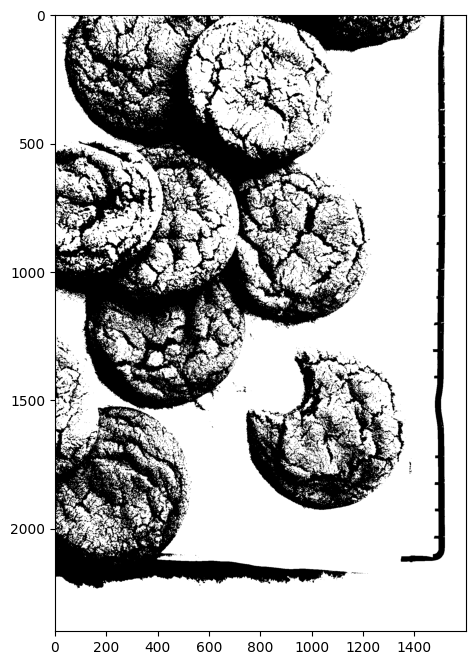

In [8]:
img = cv2.imread('cookie.jpg',0)

ret6, thresh6 = cv2.threshold(img,umbral,255,cv2.THRESH_OTSU)

plt.imshow(thresh6, cmap="gray")

## 2. Colour Thresholding

Color thresholding takes advantage of the similarity of pixels based on their color. It is applicable in different colour spaces like RGB, HSV or CMYK. A common use for this method is to select, separate, and swap a green background to shoot videos with a different background.

<img src='https://pbblogassets.s3.amazonaws.com/uploads/2019/07/29071701/green-screen-set.jpg' width='50%'>

In [2]:
# Read in the image
image = mpimg.imread('flag_green_screen.jpg')

# Show image dimensions (height, width and depth (color))
print('Image dimensions:', image.shape)

Image dimensions: (720, 1280, 3)


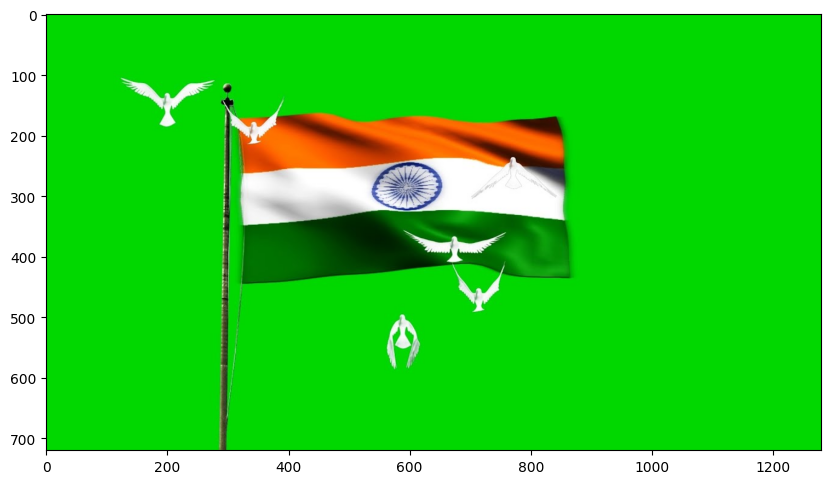

In [3]:
# Show the image
plt.imshow(image)

In [16]:
# Define the color selection limits in RGB values
upper_green = np.array([180,255,180])
lower_green = np.array([0,210,0])

### Create a mask

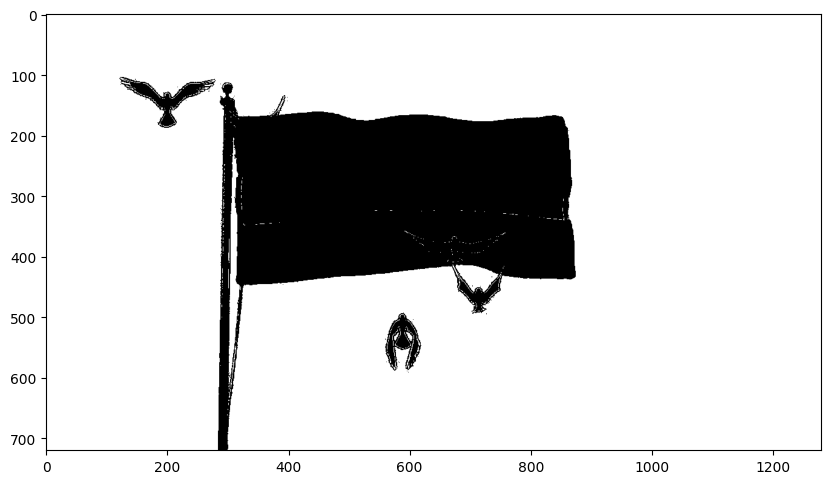

In [17]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Display the mask
plt.imshow(mask, cmap='gray')

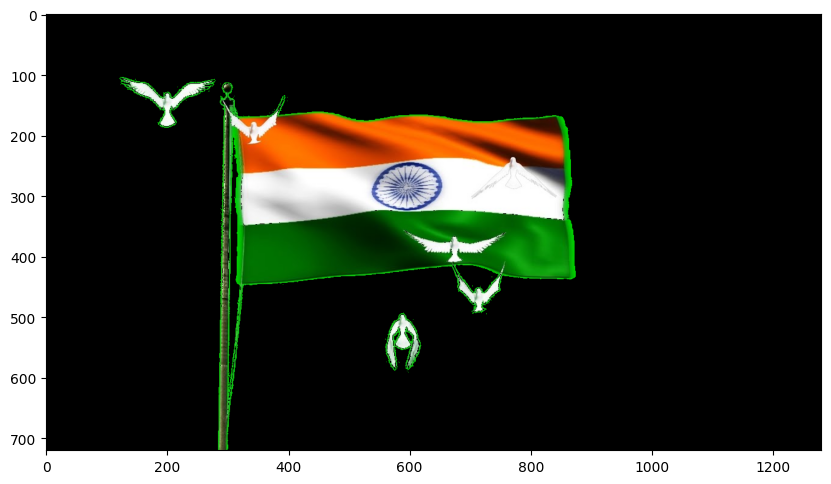

In [18]:
# Mask the image to reveal the flag
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Show the result
plt.imshow(masked_image)

### Mask and include a background image

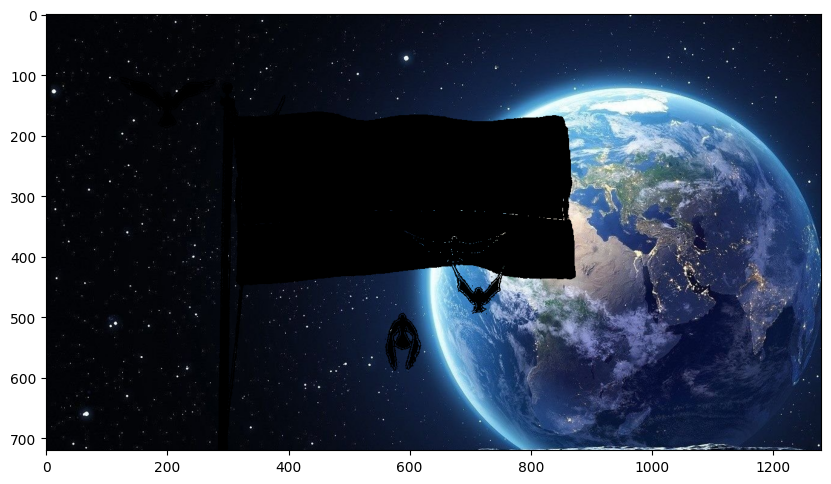

In [20]:
# Load in a background image
background_image = mpimg.imread('moon_background.jpg')

background_image = background_image[0:720, 0:1280]

masked_image2 = np.copy(background_image)

masked_image2[mask == 0] = [0, 0, 0]

plt.imshow(masked_image2)


### Create a new image

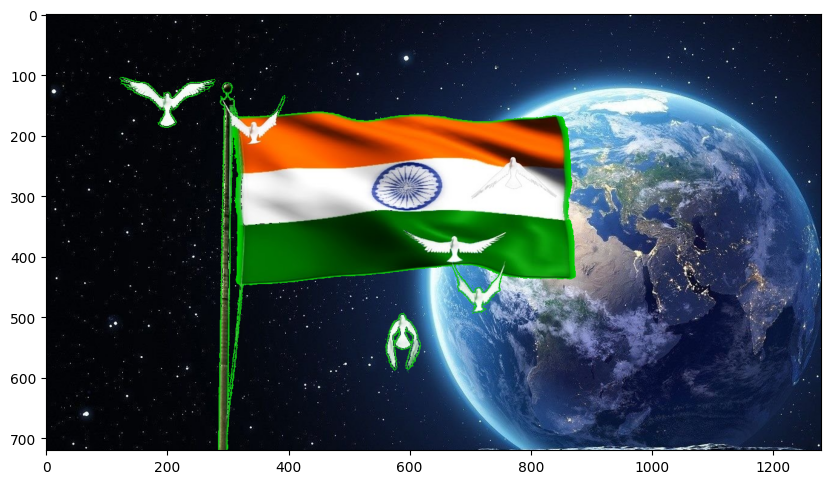

In [21]:
complete_image = masked_image + masked_image2

plt.imshow(complete_image)

## 3. Colour Thresholding for Variable Colours
The above thresholding method is very useful when you have an image/video with uniform color sections, but it can have problems when one needs to select sections with variable brightness, shadows or colors.

For these cases, we can use the HSV color space, which takes Hue (H), Saturation (S), and Value (V) into account when defining colors. Of these three channels, the H channel stores the pure color value and remains very consistent regardless of excessive shadows or brightness, so it will help us more to find objects with variable colors. Note, hue range is [0,179], saturation range is [0,255], and value range is [0,255]. Although these are the predefined ranges in OpenCV, different software use different scales.
<center>
<img src='https://drive.google.com/uc?id=14s-GcR-QdXXlUkuceEKOcvB4q159A0Rv' width='50%'>
</center>
For the following example, we will make use of HSV to segment blue balloons.

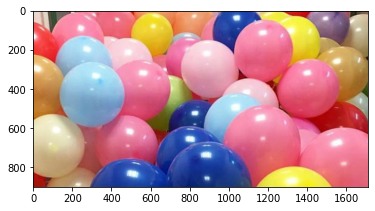

In [ ]:
# First, let's implement colour thresholding using RGB
# Read in the image
image = cv2.imread('ballons.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Separate each channel

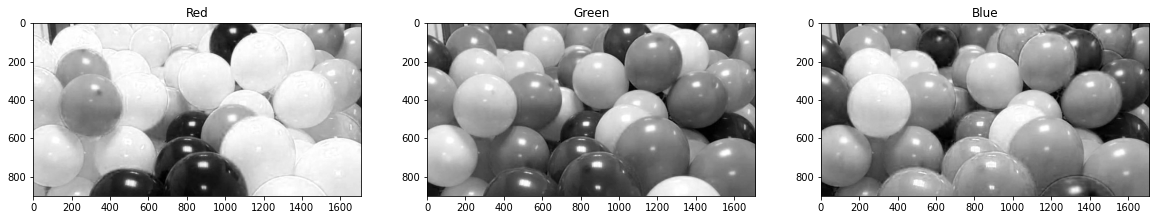

In [ ]:
# RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')

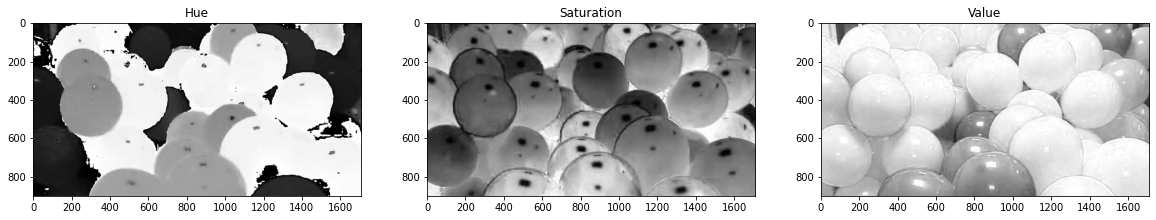

In [ ]:
# Now, lets convert the image to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

### Mask the image in RGB

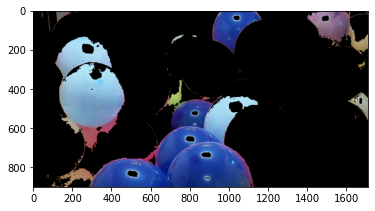

In [ ]:
# Define our color selection criteria in RGB values
lower_blue = np.array([0,0,80])
upper_blue = np.array([180,255,255])

# Define the masked area in RGB space
mask_rgb = cv2.inRange(image, lower_blue, upper_blue)

# Mask the image
masked_image = np.copy(image)
masked_image[mask_rgb==0] = [0,0,0]

# Show the masked
plt.imshow(masked_image)

### Mask the image in HSV

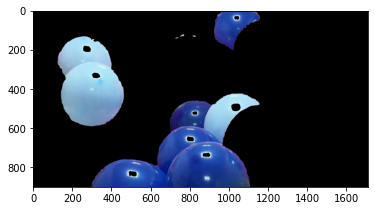

In [ ]:
# Define our color selection criteria in HSV values
lower_hue = np.array([80,40,40])
upper_hue = np.array([130,255,255])

# Define the masked area in the HSV space
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# Mask the image
masked_image_hsv = np.copy(image)
masked_image_hsv[mask_hsv==0] = [0,0,0]

# Show the mask
plt.imshow(masked_image_hsv)

## 4. Watershed Segmentation

The main objective of the Watershed method is to find boundaries between regions, known as "catchments". Any image can be viewed as a topology, where this method will treat uniform regions as basins. On the other hand, high intensity sections will be considered peaks. The method will then continue to fill these basins iteratively so that it can find the intersecting boundaries between two or more basins. Both edges, the generated peaks and limits, will allow us to find exact divisions between sections of the image.

Watershed segmentation works best if you can "mark" objects as sure foreground regions and as sure background regions. The implementation of the algorithm in OpenCV proposes to control the definition of regions based on markers. Consequently, this eliminates regions that do not have markers (possible false positives). The proposed [OpenCV's method](https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html) follows the next strategy:

- Convert the image to grayscale.

- Calculate a binarized image. This is an image whose white regions should be the objects you are trying to segment.

- Calculate foreground markers. These are blobs (small regions) of connected pixels within each of the objects.

- Apply erosion to the binarized image so that it only has maxima at the locations of the foreground markers.

- Find the regions that belong to the background regions.

- Apply the Watershed method with the original image, taking into account the markers as starting regions.


Text(0.5, 1.0, 'Overlapped')

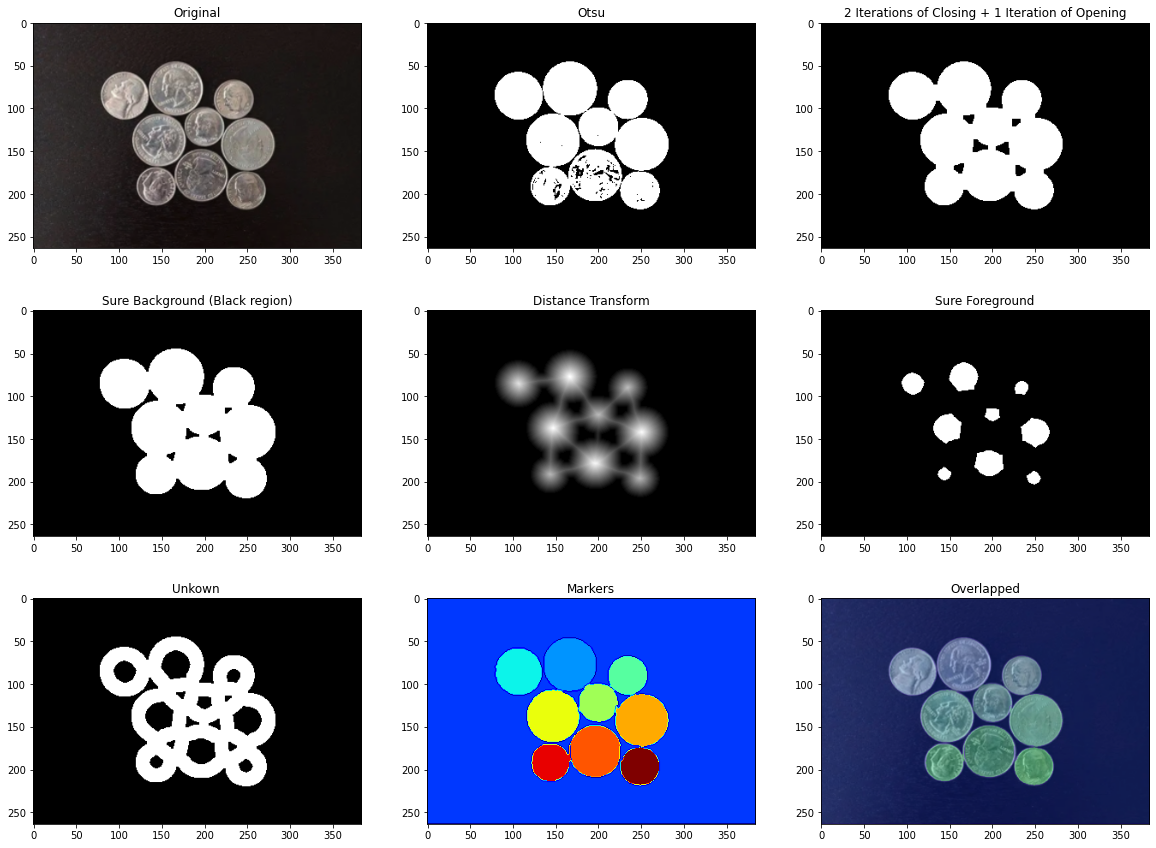

In [ ]:
import cv2

# Import an image
image = cv2.imread("image.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
base_image = np.copy(image)
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Obtain the binarised version of the image
ret, thresh = cv2.threshold(grayscale,0,255,cv2.THRESH_OTSU)
# Delete the noise with closing and opening
structuring_element = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, structuring_element, iterations = 2)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, structuring_element, iterations = 1)

# Find the area that belong to the background
sure_bg = cv2.dilate(opening, structuring_element, iterations=1)

# Find the area of the foreground
# DistanceTransform replaces the value of each pixel with its distance to the nearest background pixel
# It Receives as parameters: a binary image, function of distance, kernel size
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,cv2.THRESH_BINARY)
sure_fg = np.uint8(sure_fg)

# Find the unknown region
unknown = cv2.subtract(sure_bg,sure_fg)

# Label initial regions (markers)
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all tags so the safe background isn't confused with the tag marker 1
markers = markers+1
# Define the unknown region with zero pixels
markers[unknown==255] = 0

# Apply Watershed Segmentation
watershed = cv2.watershed(image,markers)
# Watershed assigns the value -1 to region-bounding pixels, so
# we will assign the color red
image[watershed == -1] = [255,0,0]

# Show the pictures
plt.rcParams["figure.figsize"] = (20,15)

# First row
fig, ax = plt.subplots(3, 3)
ax[0][0].imshow(base_image)
ax[0][0].set_title("Original")
ax[0][1].imshow(thresh, cmap = "gray")
ax[0][1].set_title("Otsu")
ax[0][2].imshow(opening, cmap = "gray")
ax[0][2].set_title("2 Iterations of Closing + 1 Iteration of Opening")

# Second row
ax[1][0].imshow(sure_bg, cmap = "gray")
ax[1][0].set_title("Sure Background (Black region)")
ax[1][1].imshow(dist_transform, cmap = "gray")
ax[1][1].set_title("Distance Transform")
ax[1][2].imshow(sure_fg, cmap = "gray")
ax[1][2].set_title("Sure Foreground")

# Third row
ax[2][0].imshow(unknown, cmap = "gray")
ax[2][0].set_title("Unkown ")
ax[2][1].imshow(markers, cmap = "jet")
ax[2][1].set_title("Markers")
ax[2][2].imshow(base_image)
ax[2][2].imshow(watershed, cmap = "winter",alpha=0.3)
ax[2][2].set_title("Overlapped")

## 5. Region Growing

Similar to Watershed Segmentation, Region Growing is a method oriented to leverage intrinsic regions in an image. The purpose of the method is to merge the points that are close enough in terms of the intensity similarity. Therefore, the output of this algorithm is a set of clusters, where each cluster is a set of points that are considered to be a part of the same component/smooth region.

The algorithm mainly requires a set of seeds, which will help initialise the regions. Then, for every seed point, the algorithm will evaluate its neighbouring points and join them to the seed's group, if the pixels are similar in terms of intensity. Region Growing is applicable in OpenCV using the `cv2.floodFill` function. This function accepts the following parameters:

`cv2.floodFill(image, mask, seed_point, new_val, lo_diff, up_diff, flags)`

Where:

- **image:** An RGB or greyscale image

- **mask:** Binary image, 2 pixels larger vertivally and horizontally than the original image. This parameter can be left as None if no mask is going to be provided.

- **seed_point:** Starting point to apply the algorithm. There can be several seed points.

- **new_val:** New color that will be applied to all pixels connected to the seed points.

- **lo_diff:** Maximal lower brightness/color difference between the currently observed pixel and one of its neighbors belonging to the component, or a seed pixel being added to the component.

- **up_diff:** Maximal upper brightness/color difference between the currently observed pixel and one of its neighbors belonging to the component, or a seed pixel being added to the component.

- **flags:** Defines the neighbourhood that will be evaluated to extend the region. The default value of 4 means that only the four nearest neighbor pixels (those that share an edge (vertical or horizontal)) are considered. A connectivity value of 8 means that the eight nearest neighbor pixels (those that share a corner) will be considered.

You can review more details [here](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=floodfill#floodfill:~:text=floodFill-,%C2%B6,-Fills%20a%20connected).

Text(0.5, 1.0, 'Final Result')

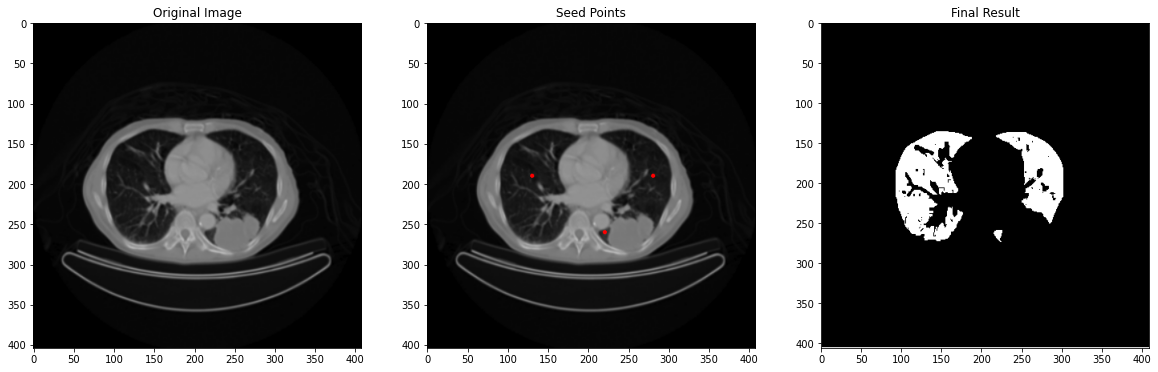

In [ ]:
# Read in the image
image = cv2.imread("ct.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create copies to update and show later
image_copy = np.copy(image)
image_copy2 = np.copy(image)

# Create a mask. Notice how we're adding 2 pixels to the right and the bottom
mask = np.zeros((image.shape[0]+2,image.shape[1]+2), np.uint8)

# Create a tuple with the seeds. These must be defined manually, but you might
# investigate how to find them automatically
seed_points = ((130, 190), (280, 190),(220, 260))
# The colour variance defines how much can be the lo_diff and up_diff parameters
# You can think of this tuple as the threshold to be used in the RGB channels
colour_variance_threshold = (3, 3, 3)

# Apply floodFill with all seed points. Before, draw the seed points in a copy image
for seed_point in seed_points:
  cv2.circle(image_copy, seed_point, 1, (255,0,0), 2)
  cv2.floodFill(image_copy2, mask, seed_point, (255,255,255), colour_variance_threshold, colour_variance_threshold)

# Show the results
plt.rcParams["figure.figsize"] = (20,10)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
ax0.imshow(image)
ax0.set_title("Original Image")
ax1.imshow(image_copy)
ax1.set_title("Seed Points")
ax2.imshow(mask, cmap="gray")
ax2.set_title("Final Result")

## 6. Morphological algorithms

Now, it's time to see how Morphological Algorithms are used to improve the resulting segmentation masks. Morphological algorithms are composed of morphological operators and try to refine further a mask . Here, we will see the first four of the most used operators: dilation, erosion, opening, and closing.

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.harvard.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


(630, 945)
uint8
(630, 945)
uint8


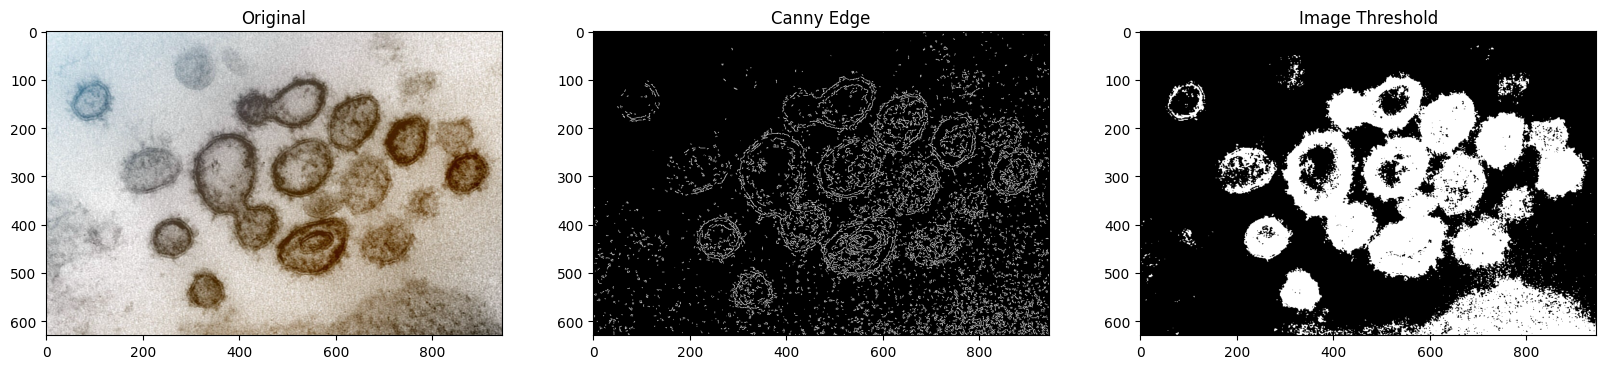

In [ ]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import os, requests
import numpy as np

# Download a microscope image depecting covid viruses from the Internet
img_data = requests.get("https://news.harvard.edu/wp-content/uploads/2020/03/Coronavirus-Image-1-945x630.jpg" , verify=False).content
with open('Coronavirus-Image-1-945x630.jpg', 'wb') as handler:
    handler.write(img_data)


# Load the image
image = cv2.imread('Coronavirus-Image-1-945x630.jpg')

# Convert the training image to gray Scale
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Implement canny edge detection
canny = cv2.Canny(grayscale, 150, 200)

# Implement image threshold
ret, thresh = cv2.threshold(grayscale,150,200,cv2.THRESH_BINARY_INV)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Original')
ax1.imshow(image, cmap='gray')

ax2.set_title('Canny Edge')
ax2.imshow(canny, cmap='gray')

ax3.set_title('Image Threshold')
ax3.imshow(thresh, cmap='gray')

print(canny.shape)
print(canny.dtype)

print(thresh.shape)
print(thresh.dtype)

### 6.1 Dilation
Dilation enlarges bright, white areas in an image by adding pixels to the perceived boundaries of objects in that image.

To dilate an image in OpenCV, you can use the `dilate` function and three inputs:
- an original binary image
- a kernel that determines the size of the dilation (None will result in a default size)
- a number of iterations to perform the dilation (typically = 1).

In the following example, we have a 5x5 cross-shape structuring element $s_1$ and a complete structuring element $s_2$ . We’ll use the image downloaded before to apply the operator. Notice the effect of both structuring element.

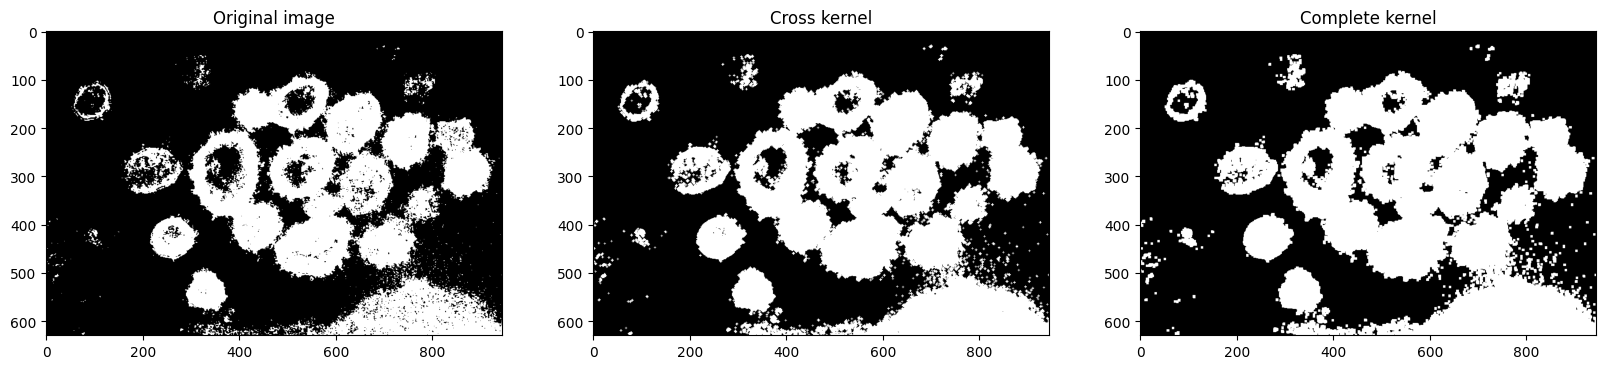

In [ ]:
# Reads in a binary image
copy3 = np.copy(thresh)

# Create a 5x5 kernel s
s_1 = np.uint8([[0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [1, 1, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                    ])

s_2 = np.ones((5,5),np.uint8)

# Dilate the image
dilation = cv2.dilate(copy3, s_1, iterations = 1)

# Dilate the image
dilation2 = cv2.dilate(copy3, s_2, iterations = 1)


f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20,10))

ax0.set_title('Original image')
ax0.imshow(copy3, cmap='gray')

ax1.set_title('Cross kernel')
ax1.imshow(dilation, cmap='gray')

ax2.set_title('Complete kernel')
ax2.imshow(dilation2, cmap='gray')

### 6.2 Erosion
Erosion does the opposite: it removes pixels along object boundaries and shrinks the size of objects.


In [ ]:
# Reads in a binary image
copy4 = np.copy(thresh)

# Erode the image
erode = cv2.erode(copy4, s_1, iterations = 1)

# Erode the image
erode2 = cv2.erode(copy4, s_2, iterations = 1)

# Display the results
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20,10))
ax0.set_title('Original image')
ax0.imshow(copy4, cmap='gray')

ax1.set_title('Cross kernel')
ax1.imshow(erode, cmap='gray')

ax2.set_title('Complete kernel')
ax2.imshow(erode2, cmap='gray')

### 6.3 Opening & Closing

The last two operations are often combined for better results. One such combination is called **opening**, which is erosion followed by dilation. This is useful for noise reduction in which erosion first gets rid of noise (and shrinks the object), then dilation enlarges the object again, but the noise will have disappeared from the previous erosion!

To implement this in OpenCV, we use the function `morphologyEx` with the image, the operation we want to perform, and our kernel passed in.

In [ ]:
# Reads in a binary image
copy5 = np.copy(thresh)

# Opening the image
opening = cv2.morphologyEx(copy5, cv2.MORPH_OPEN, s_1)

# Opening the image
opening2 = cv2.morphologyEx(copy5, cv2.MORPH_OPEN, s_2)

# Display the results
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20,10))
ax0.set_title('Original image')
ax0.imshow(copy5, cmap='gray')

ax1.set_title('Cross kernel')
ax1.imshow(opening, cmap='gray')

ax2.set_title('Complete kernel')
ax2.imshow(opening2, cmap='gray')

**Closing** is the reverse combination of opening; it’s dilation followed by erosion, which is useful in closing small holes or dark areas within an object.

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.



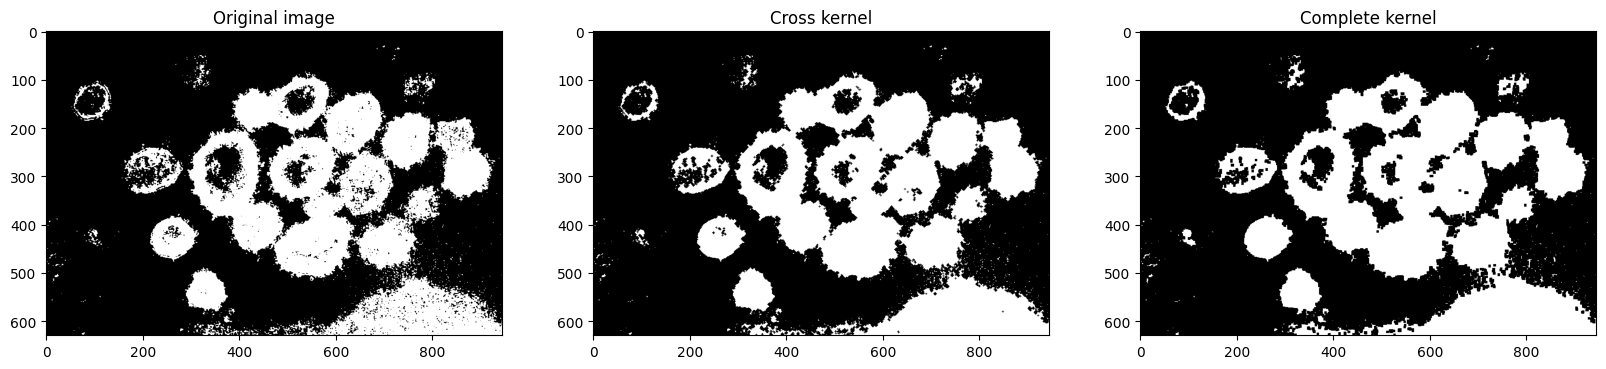

In [ ]:
# Reads in a binary image
copy6 = np.copy(thresh)

# Opening the image
closing = cv2.morphologyEx(copy6, cv2.MORPH_CLOSE, s_1)

# Opening the image
closing2 = cv2.morphologyEx(copy6, cv2.MORPH_CLOSE, s_2)

# Display the results
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20,10))
ax0.set_title('Original image')
ax0.imshow(copy6, cmap='gray')

ax1.set_title('Cross kernel')
ax1.imshow(closing, cmap='gray')

ax2.set_title('Complete kernel')
ax2.imshow(closing2, cmap='gray')

## **Exercise 1:** Split and merge approach

For this exercise you will have to implement the Split and Merge approach. Create a function that creates segments according to the difference and similarity of the regions. You are encouraged to parameterise the evaluation criteria to define the similarity between two subregions.

## **Exercise 2:** Remote Sensing
Day by day, many farmers around the world struggle to save water for their crops. This is why different irrigation methods were invented in the last few centuries. For instance, Center Pivot Irrigation (CPI) uses powerful water pumps that are capable of pumping water up to 7 kilometers in a circular area. This causes the irrigated areas to take on the shape of green circles. Surprisingly, the radius of each circle is around 3.5 km.

On this occasion, imagine you were given a set of satellite images depicting subsections of a massive region that currently grows vegetables and uses CPI. Your task will be: to calculate the **percentage** of crop fields that is currently productive and also the **percentage** that is not productive. To start with this work, you will only have to work with the following satellite image, but it will give you an idea of ​​how to process several images to understand if the agricultural region of a country is productive or not.

Finally, your solution will be marked based on the precision of your method. A single binarization step might not be accurate to calculate the entire area of the crop fields. As a hint, you can leverage HoughTransform for Circles this time.

Image:
https://drive.google.com/file/d/1HBFMUzkGrpm4pxXEHK_I6hmebWW-ZXnH/view?usp=sharing

Ref: https://lifeinsaudiarabia.net/why-do-they-make-circular-crop-fields-in-saudi-arabia/


## **Exercise 3:** Otsu's Method

For this exercise you will have to implement the Otsu's method inside a function from scratch using only Numpy. The special characteristic of your function is that it should return the path of a GIF file where you show the increase of the thresholding *T* and the classification (e.g. considering two categories: background and foreground) of pixels per iteration. Consider the following [example](https://www.blog.pythonlibrary.org/2021/06/23/creating-an-animated-gif-with-python/) to save the gif.

Any GIF image requires a series of images that you can create with matplotlib's function named `plt.savefig()`. You can also explore the module  `matplotlib.animation`.

## **Exercise 4:** Water Pollution
Water is usually formed by small pollution particles and some bacteria. However, the presence of big quantities of certain types of bacteria should turn on the alarms. For example, the presence of coliform bacteria, specifically **E. coli**, in drinking water suggests that it may contain pathogens that could cause diarrhoea, vomiting, cramps, nausea, headaches, fever, or fatigue.

Given that to classify and detect dangerous bacteria and harmful particles usually need a specialist and proper analysis equipment, this type of fieldwork has become expensive and sometimes unavailable in remote areas. Therefore, you will need to implement a way to automatically count and classify if a water microscope picture is drinkable or not.

The exercise's main purpose is to implement morphological image processing so you'll have to use at least four of the methods previously explained in the pre-processing step. On the other hand, you can use the counting and detection method of your selection (e.g. you can explore Generalised Hough Transform, cv2.findContours(), and cv2.drawContours()). For this exercise, you can use the following image: https://drive.google.com/file/d/1f5wnYfWC3Gag2Y7yx8yRUdprxONE-H5c/view?usp=sharing), which contains a microscope sample with ecoli bacteria. On the other hand, you also have the option to find other types of bacterias in a different image. When it's about finding image datasets, *Google Dataset Search* (https://datasetsearch.research.google.com/) is one of the most useful tools, so you can search for  bacteria image datasets and implement the tutorial with those images.

## **Exercise 5:** Morphological Algorithms

Your team will have to investigate one of the following morphological algorithms, explain its inner workings, and implement it from scratch showing its functionality with thre examples.

- Region filling -> Alpha Team, Dinamita
- Skeleton detection -> LINEAC
- Thinning and Thikening -> PPG, NDA


## **Exercise 6:** Watershed Segmentation

Everybody loves easy peelers! This time, you will have to implement Watershed segmentation to segment easy peelers  from crop images. Implement all necessary preprocessing (point and filtering processing methods) and postprocessing (morphological operators) to enhance your results.

For instance, your algorithm should be able to analyse the following image and state which papers are ready to collect:

<img src='https://www.ocregister.com/wp-content/uploads/migration/kz1/kz19bp-b78614312z.120100309130458000gq5n305a.1.jpg?w=1200' width='50%'>

## **Exercise 7:** Universal Fingerprint Alphabet

For this exercise, you will have to combine image segmentation methods with morphological operators to create a dictionary of the Universal Fingerprint Alphabet (alphabeto dactilológico universal).

Download or take screenshoots of the following [video](https://www.youtube.com/watch?v=zjswxA0GsIw) where the authors explain the way to communicate each letter. Upload those images, normalise their dimensions, and obtain segments of the main hand.

Finally, create a function that asks the user for a character and then, shows the base image, and the corresponding segmentation mask side by side. You are encouraged to use Pandas.